In [55]:
__nbid__ = '0022'
__author__ = 'Felix Pat <felixpat10@email.arizona.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20250827' # yyyymmdd; Fecha de versión de este notebook
__datasets__ = ['gogreen_dr1']  # Conjunto de datos usados en este notebook
__keywords__ = ['gemini llp','tap','cluster','photometry','redshift','file service','spectra','catalogues'] # keywords relevant to this notebook

# GOGREEN DR1: Membresía a Cúmulos de Galaxias
*Autor: Felix Pat (Univ. of Arizona), Stéphanie Juneau (NOIRLab), David Herrera y el equipo de Astro Data Lab*

### Tabla de contenido
* [Objetivo](#GGgoal)
* [Resumen](#GGsummary)
* [Avisos legales y atribuciones](#attribution)
* [Importaciones y configuración](#imports)
* [Autenticación](#auth)
* [Lectura de catálogos desde la base de datos de Data Lab](#GG0)
* [Posición de todos los cúmulos](#GG1)
* [Cúmulo con la mayor masa dinámica](#GG2)
* [Posición de galaxias en el cúmulo seleccionado](#GG3)
* [Elegir URL de la imagen del cúmulo seleccionado](#GG4)
* [Graficar imagen de galaxias en el cúmulo seleccionado](#GG5)
* [Referencias](#GG6)

<a class="anchor" id="GGgoal"></a>
# Objetivo
Este notebook tiene como objetivo visualizar las posiciones en el cielo y el corrimiento al rojo de las galaxias en función de su pertenencia a cúmulos.

<a class="anchor" id="GGsummary"></a>
# Resumen
Este notebook demuestra cómo leer tablas de datos en general, proyectar posiciones de cúmulos en una proyección completa del cielo tipo Mollweide, seleccionar el cúmulo con la mayor masa dinámica (trazada por la dispersión de velocidad), y graficar las posiciones de las galaxias codificadas por color según el corrimiento al rojo y separadas por pertenencia al cúmulo.

<a class="anchor" id="GGdisclaimer"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="GGimport"></a>
# Importaciones y configuración

In [31]:
# Librerías estándar
import re
import operator
from getpass import getpass

# De 3ros
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500) # Prevee exceso de columnas
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams['font.size'] = 14 # Aumenta el tamaño del texto en los gráficos
from pyvo.dal import sia
from IPython.display import display_html

import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits, ascii
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from astropy.utils.data import download_file
from astropy.wcs import WCS

# Data Lab
from dl import queryClient as qc, storeClient as sc

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

In [32]:
# Definir cosmología
cosmo = FlatLambdaCDM(H0=70, Om0=0.3) 
# Esta URL indica al servicio SIA dónde encontrar las imágenes y los metadatos de las imágenes
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/gogreen_dr1"
svc = sia.SIAService(DEF_ACCESS_URL)

<a class="anchor" id="GG0"></a>
# Lectura de las tablas principales
El conjunto completo de datos de GOGREEN se puede encontrar [aquí](https://datalab.noirlab.edu/gogreendr1/index.php) bajo la pestaña 'Acceso a Datos'. La primera parte de este notebook se basará en la información disponible para todos los cúmulos de la 'clusters_table' y la información de las galaxias de la 'redshift_table'. Dado que no necesitamos toda la fotometría/imágenes, solo las recuperaremos según sea necesario. 

Podemos usar la función `globals()` para crear variables dinámicamente. [Globals()](https://docs.python.org/3/library/functions.html#globals) devuelve el diccionario que implementa el espacio de nombres del módulo actual. Para código dentro de funciones, esto se establece cuando se define la función y permanece igual sin importar dónde se llame la función.

In [33]:
dataset = 'gogreen_dr1.'
tables = ['clusters', 'redshift']

for table in tables:
    globals()['%s_table'%table] = qc.query('select * from %s%s' % (dataset, table), fmt = 'pandas')
    print("%s table" %table)
    display_html(globals()[('%s_table'%table)].head(5))

clusters table


,cluster,fullname,cluster_id,ra_best,dec_best,ra_gmos,dec_gmos,pa_deg,redshift,vdisp,vdisp_err,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,kphot_cat,photoz_cat,stelmass_cat,image_u,image_b,image_g,image_v,image_r,image_i,image_z,image_j,image_j1,image_y,image_k,image_irac1,preimage,random_id
0,COSMOS-125,COSMOS-125,14,150.6208,2.1675,150.62720,2.159200,270.0,1.4040,NaN,400,GS2015ALP001-02,GS2016ALP001-02,GS2019ALP001-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GMICOSMOS-125_pseudo,82.235855
1,COSMOS-221,COSMOS-221,14,150.5620,2.5031,150.57020,2.498600,90.0,1.1960,200.0,50,GS2014BLP001-05,GS2015ALP001-01,GS2016ALP001-01,GS2019ALP001-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GMICOSMOS-221_pseudo,16.224028
2,COSMOS-28,COSMOS-28,14,149.4692,1.6685,149.45930,1.675030,78.0,1.3160,285.0,75,GN2015BLP004-03,GN2019ALP004-01,GN2019ALP004-02,GN2019ALP004-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GMICOSMOS-28_pseud,14.708872
3,COSMOS-63,COSMOS-63,14,150.3590,1.9352,150.36147,1.928342,165.0,1.1722,NaN,70,GN2015BLP004-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GMICOSMOS-63_pseudo,10.737590
4,SPT0205,SPT-CL J0205-5829,1,31.4510,-58.4803,31.43896,-58.482900,90.0,1.3227,678.0,57,GS2014BLP001-06,GS2016BLP001-09,GS2016BLP001-02,GS2017BLP001-03,GS2017BLP001-04,GS2017BDD010-01,NaN,NaN,NaN,NaN,NaN,SPTCL-0205_totalall_FOURSTARKs.cat,SPTCL-0205_totalall_Ks.zout,SPTCL-0205_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,NaN,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,NaN,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20140928S0161_add,73.878470


redshift table


,cluster,specid,ra,dec,objclass,redshift,redshift_quality,extver,spec_flag,snr_8500_var,snr_8500_rms,d4000,ed4000,ewoii,eewoii,ewhdelta,eewhdelta,ewoii_model,eewoii_model,f_oii,ef_oii,sfr_oii,esfr_oii,delta_bic,member_clean,member_em,member,htm9,ring256,nest4096,random_id
0,COSMOS-125,114080478,150.60518,2.118631,1,1.41478,2,1,0,2.855579,1.827386,NaN,NaN,NaN,NaN,NaN,NaN,4.155094,1.096318,0.0,0.0,3.228765,0.796476,7.636033,-1,-1,-1,3709735,378796,111644063,59.368240
1,COSMOS-125,114080570,150.59448,2.120006,1,1.34553,4,2,0,3.217247,2.300130,1.364112,0.076498,11.551618,4.967136,5.405303,4.758426,11.549834,1.890590,0.0,0.0,4.880185,0.753583,71.387190,-1,-1,-1,3709735,378796,111644063,63.859104
2,COSMOS-125,114081196,150.58768,2.128183,3,0.96172,4,3,0,10.048548,7.505558,1.206696,0.030443,3.372206,1.760464,3.249191,1.707648,4.091792,0.768290,0.0,0.0,3.261066,0.575365,25.215458,-1,-1,-1,3709735,378796,111644085,28.451246
3,COSMOS-125,114081258,150.59691,2.129453,1,0.72447,3,4,0,4.754746,3.284939,1.433353,0.130532,1.186794,38.480305,-1.591362,6.184247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,3709735,378796,111644085,75.506805
4,COSMOS-125,114081508,150.60970,2.134149,1,1.13177,4,5,0,2.862871,1.829309,1.294710,0.089390,67.153460,35.867435,2.344702,5.377402,42.830364,3.741641,0.0,0.0,5.096052,0.379176,297.244870,-1,-1,-1,3709735,378796,111644106,52.536415


<a class="anchor" id="GG1"></a>
# Posición de los cúmulos GOGREEN en todo el cielo
Primero, necesitamos graficar las posiciones (AR, DEC) en la clusters_table. La proyección usada es Mollweide, que es una ["proyección cartográfica pseudocilíndrica de área igual"](https://en.wikipedia.org/wiki/Mollweide_projection).

In [34]:
def todos_los_cumulos_mollweide(clusters_table, ax, cumulo_de_interes=None):
    """
    Recupera las posiciones (AR, DEC) de los cúmulos en el dataset para graficarlos en una proyección de Mollweide.

    Parámetros
    ----------
    clusters_table : pandas dataframe  
    Tabla de datos para todos los cúmulos

    ax : clase matplotlib.axes.Axes  
    Grafica los datos
    
    cumulo_de_interes : pandas series como bool  
    Usado como índice para extraer fila(s) específicas del cúmulo seleccionado

    Retorna
    -------
    None
    """    
    # Establecer AR y DEC en unidades de grados
    clusters_table.ra_best = clusters_table.ra_best - 180 # establecer rango de AR en (-180, 180)
    ra = coord.Angle(clusters_table['ra_best']*u.degree,unit=u.deg)
    ra = ra.wrap_at(180*u.degree) # hace que la gráfica sea 'continua' en 180 grados
    dec = coord.Angle(clusters_table['dec_best']*u.degree,unit=u.deg)

    # Graficar la proyección de posiciones
    ln = ax.scatter(ra.radian, dec.radian, c=clusters_table.redshift, lw=0, cmap='turbo')
    fig.colorbar(ln, fraction=.02, pad=0.04, label='corrimiento al rojo')
    if cumulo_de_interes is not None:
        ra = coord.Angle(clusters_table.ra_best[cumulo_de_interes]*u.degree,unit=u.deg)
        ra = ra.wrap_at(180*u.degree)
        dec = coord.Angle(clusters_table.dec_best[cumulo_de_interes]*u.degree,unit=u.deg)
        ax.scatter(ra.radian, dec.radian, s=150, facecolors='black', marker=(5, 1)) # graficar un símbolo de estrella en la posición del cúmulo seleccionado
    plt.title("Posición de los cúmulos de galaxias de GOGREEN codificados por color según corrimiento al rojo")
    plt.xlabel("AR (grados)")
    plt.ylabel("DEC (grados)")
    plt.grid(True)
    ax.set_aspect(0.5) # Establecer la proporción de la gráfica a la escala de los ejes
    plt.show()
    clusters_table.ra_best = clusters_table.ra_best + 180 # Restaurar valores de AR
    
    # Imprimir número de cúmulos como información
    print(' ')
    print(f'Hay {len(clusters_table)} cúmulos de galaxias en el panel.')

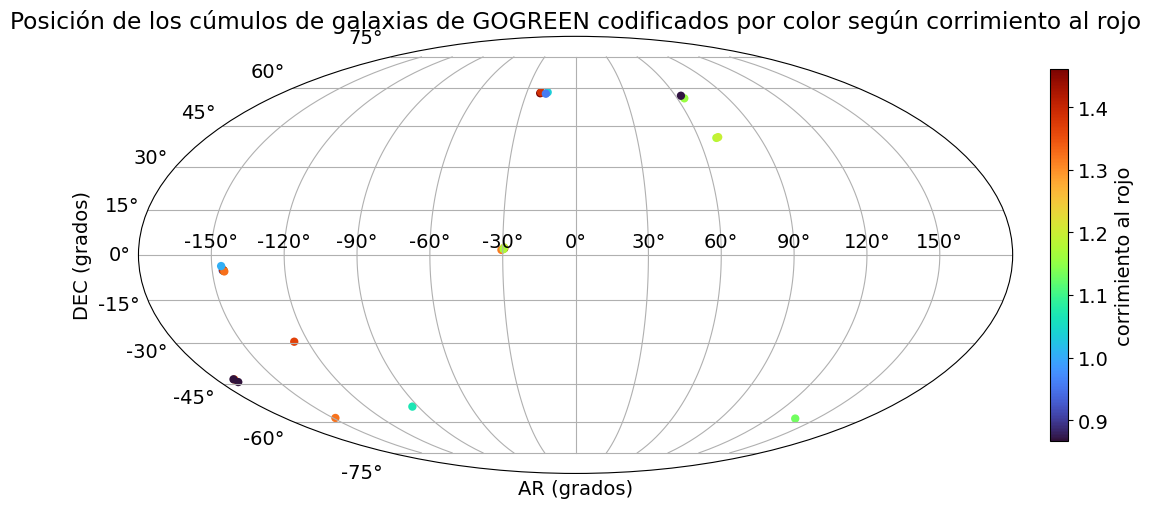

 
Hay 26 cúmulos de galaxias en el panel.


In [35]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="mollweide")
todos_los_cumulos_mollweide(clusters_table, ax);

Hay 26 cúmulos de galaxias en este conjunto de datos, y a veces aparecen distribuidos cerca unos de otros en el cielo. Sin embargo, la barra de colores de corrimiento al rojo indica que esta proyección 2D no necesariamente refleja qué tan cercanos están los cúmulos entre sí en el espacio.

<a class="anchor" id="GG2"></a>
# Seleccionar el cúmulo con la mayor masa dinámica
En este ejemplo, se selecciona el cúmulo de galaxias con la mayor dispersión de velocidades (`vdisp`) como un proxy para el cúmulo con la mayor masa dinámica. En astronomía, la [dispersión de velocidades (σ)](https://en.wikipedia.org/wiki/Velocity_dispersion) es la dispersión estadística de las velocidades alrededor de la velocidad media de un grupo de objetos astronómicos, como un cúmulo abierto, cúmulo globular, galaxia, cúmulo de galaxias o supercúmulo. Midiendo las velocidades radiales de los miembros del grupo mediante espectroscopía astronómica, se puede estimar la dispersión de velocidades de ese grupo y usarla para derivar la masa del grupo a partir del teorema del virial.

La estrella negra indica la posición del cúmulo seleccionado. En gráficos posteriores, la estrella negra representa la posición media de todas las galaxias identificadas como miembros del cúmulo.

In [36]:
def seleccionar_cumulo(clusters_table):
    """
    Devuelve una serie de pandas como bool, el índice y el nombre del cúmulo seleccionado.

    Parámetros
    ----------
    clusters_table : pandas dataframe
    Tabla de datos de todos los cúmulos

    Retorna
    -------
    cumulo_de_interes : pandas series como bool
    Usado como índice para obtener fila(s) específica(s) del cúmulo seleccionado
    
    index_num : int
    Índice del cúmulo seleccionado
    
    select_name : string
    Nombre del cúmulo seleccionado
    """
    # Selecciona el cúmulo con la mayor dispersión de velocidades
    cumulo_de_interes = clusters_table.vdisp == np.nanmax(clusters_table.vdisp)
    for i in range(len(cumulo_de_interes)):
        if cumulo_de_interes[i]==True:
            print("Índice =", i)
            index_num = i
    select_ra = clusters_table.ra_best[index_num]
    select_dec = clusters_table.dec_best[index_num]
    select_name = clusters_table.cluster[index_num]
    print("AR = %f, DEC = %f" %(select_ra, select_dec))
    print(select_name)
    
    return (cumulo_de_interes, index_num, select_name)

In [37]:
cumulo_de_interes, index_num, selection = seleccionar_cumulo(clusters_table)

Índice = 25
AR = 243.311000, DEC = 56.825000
SpARCS1613


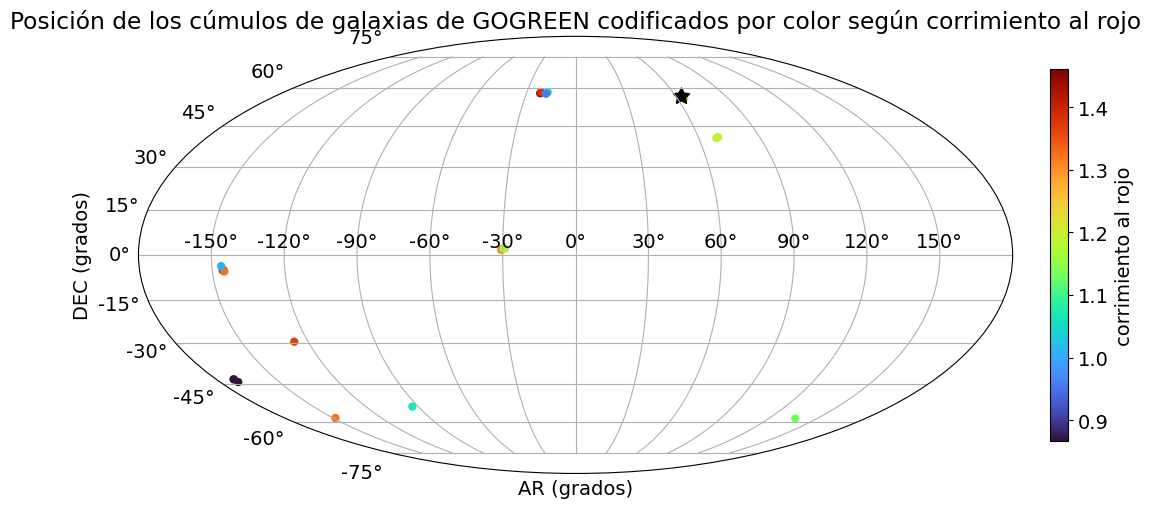

 
Hay 26 cúmulos de galaxias en el panel.


In [38]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="mollweide")
todos_los_cumulos_mollweide(clusters_table, ax, cumulo_de_interes=index_num);

<a class="anchor" id="GG3"></a>
# Posición de las galaxias del cúmulo seleccionado separadas por corrimiento al rojo
Ahora, graficamos las posiciones de las galaxias en el cúmulo de interés. 
El primer gráfico muestra todas las galaxias codificadas por corrimiento al rojo. 
Los dos gráficos siguientes separan las galaxias en no miembros y miembros, respectivamente, usando la misma codificación por corrimiento al rojo. 
Tenga en cuenta que los valores del eje x (AR) disminuyen de izquierda a derecha para proyectar Este a la izquierda y Oeste a la derecha.

In [39]:
def galaxias_del_cumulo(index_num, name, cluster_table, redshift_table):
    """
    Recupera las posiciones (AR, Dec) de todas las galaxias en el cúmulo seleccionado y las grafica según
    si son miembros o no, usando codificación por corrimiento al rojo.

    Parameters
    ----------
    index_num : int
    Índice del cúmulo seleccionado
    
    name : string
    Nombre del cúmulo seleccionado
    
    clusters_table : pandas dataframe
    Tabla de datos de todos los cúmulos
    
    redshift_table : pandas dataframe
    Tabla de datos de todas las galaxias

    Returns
    -------
    None
    """
    # seleccionar dataframe de galaxias para el cúmulo seleccionado
    keep_galaxy_name = redshift_table.cluster == name
    cluster_candidates = redshift_table[keep_galaxy_name]
    display_html(cluster_candidates.head(5))
    
    # columna con información de membresía al cúmulo
    member = cluster_candidates.member
        
    criteria = [member>=-1, member==-1, member==0, member==1]
    plot_titles_list = ['Posición de todas las galaxias en el cúmulo %s'%name, \
                      'Posición de galaxias indeterminadas en el cúmulo %s'%name, \
                      'Posición de galaxias no miembros en el cúmulo %s'%name, \
                      'Posición de galaxias miembros en el cúmulo %s'%name] # lista de títulos de gráficos
    for i, plot_selection in enumerate(criteria):
                
        # crear listas booleanas True/False para cada criterio
        criterion_boolean_list = criteria[i]

        galaxy_ra, galaxy_dec, galaxy_redshift = cluster_candidates.ra[criterion_boolean_list], \
                                                         cluster_candidates.dec[criterion_boolean_list], \
                                                         cluster_candidates.redshift[criterion_boolean_list]
        
        if len(galaxy_ra)==0:
            continue
        else:
            # graficar posiciones de las galaxias en el cúmulo codificadas por corrimiento al rojo
            fig, ax = plt.subplots(figsize=(11, 9))
            ln = ax.scatter(galaxy_ra,galaxy_dec,s=40,c=galaxy_redshift,lw=0,cmap='turbo',vmin=np.nanmin(cluster_candidates.redshift),vmax=np.nanmax(cluster_candidates.redshift))
            ax.scatter(cluster_table.ra_best[index_num],cluster_table.dec_best[index_num],s=150,facecolors='none',edgecolors='k',marker=(5, 1)) # centro del cúmulo
            
            ra = cluster_candidates.ra
            dec = cluster_candidates.dec
            diffx = np.ptp(ra)/8
            diffy = np.ptp(dec)/8
            ax.set_xlim(np.nanmax(ra)+diffx, np.nanmin(ra)-diffx) # establecer eje x (AR) descendente de izquierda a derecha
            ax.set_ylim(np.nanmin(dec)-diffy, np.nanmax(dec)+diffy)
            plt.title(plot_titles_list[i])
            plt.xlabel("AR (deg)")
            plt.ylabel("DEC (deg)")
            fig.colorbar(ln,ax=ax, label='Corrimiento al rojo')

,cluster,specid,ra,dec,objclass,redshift,redshift_quality,extver,spec_flag,snr_8500_var,snr_8500_rms,d4000,ed4000,ewoii,eewoii,ewhdelta,eewhdelta,ewoii_model,eewoii_model,f_oii,ef_oii,sfr_oii,esfr_oii,delta_bic,member_clean,member_em,member,htm9,ring256,nest4096,random_id
2609,SpARCS1613,219011478,243.39403,56.839787,4,0.869,3,1,0,2.327205,1.742028,1.035306,0.071498,29.257648,8.956019,7.399117,5.922949,21.473490,2.579399,0.0,0.0,0.413183,0.045922,126.824900,-1,-1,1,3517590,64208,47204267,6.832489
2610,SpARCS1613,219011493,243.31755,56.838108,4,0.836,3,2,0,7.764693,6.200861,1.378173,0.036845,-5.896739,1.822678,0.879221,1.786903,0.000109,0.363299,0.0,0.0,0.347138,0.423859,-16.454970,-1,-1,0,3517590,64207,47205463,1.596046
2611,SpARCS1613,219011508,243.40254,56.837288,4,0.873,4,3,0,2.767138,2.090008,1.099917,0.043687,65.212000,7.894663,0.876265,4.605619,76.067820,2.362012,0.0,0.0,2.367354,0.052035,2670.208700,-1,-1,1,3517590,64208,47204265,13.775793
2612,SpARCS1613,219011516,243.29166,56.836964,4,0.837,3,4,0,1.564886,1.216736,1.387622,0.107272,81.351875,41.531506,6.666695,5.442468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,0,3517590,64207,47205468,17.767511
2613,SpARCS1613,219011540,243.29465,56.834740,4,0.885,4,5,0,11.208892,5.998834,1.765499,0.064940,-1.349166,2.016261,-1.187091,2.433552,0.000106,0.323838,0.0,0.0,0.209249,0.232567,-15.582417,-1,-1,1,3517590,64207,47205468,74.871510


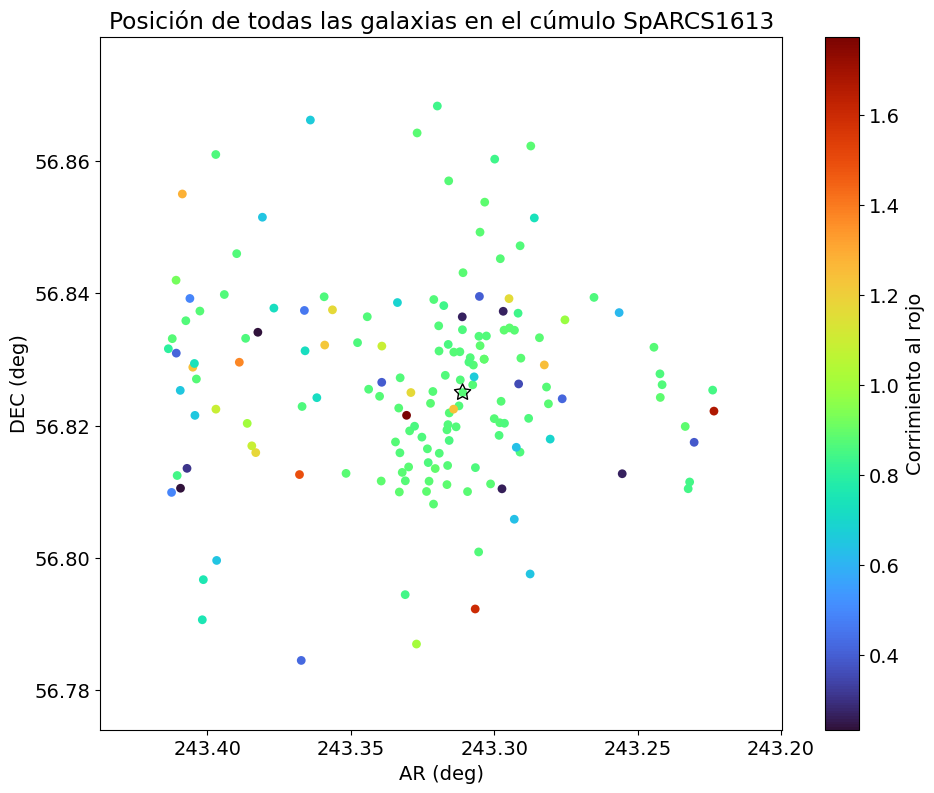

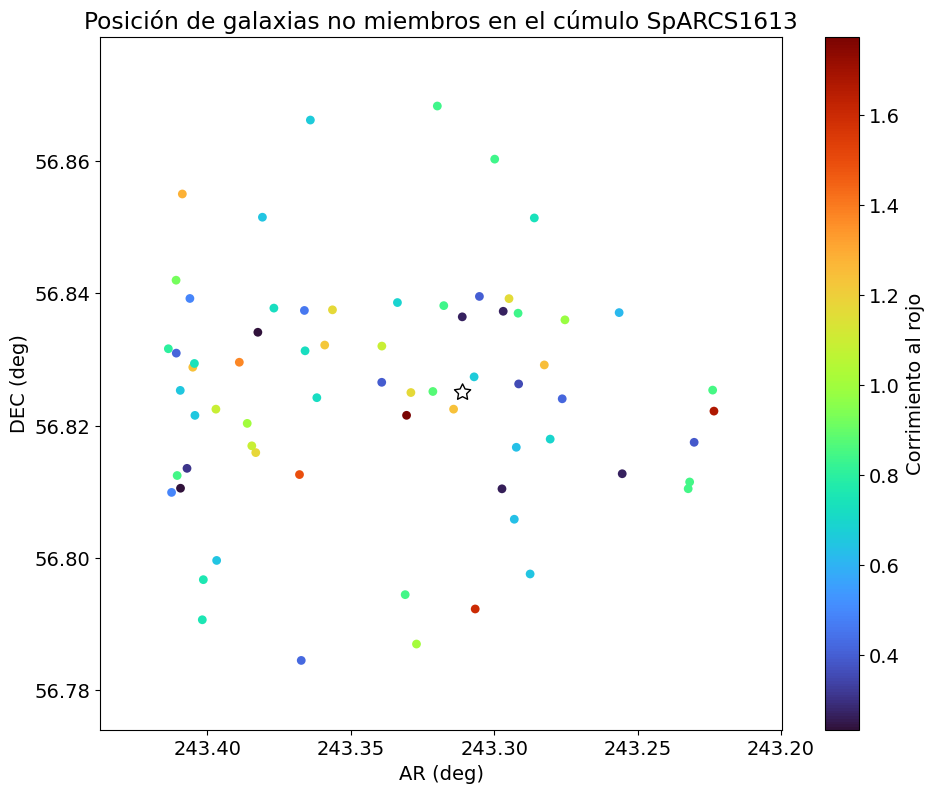

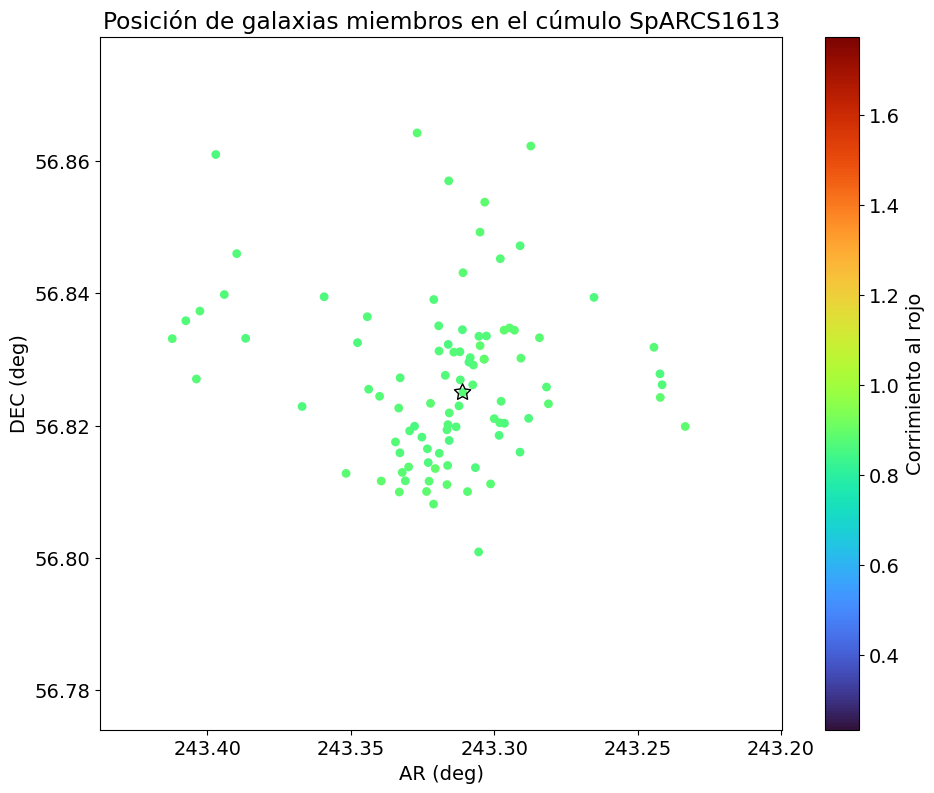

In [40]:
galaxias_del_cumulo(index_num,selection,clusters_table,redshift_table)

Podemos ver que el corrimiento al rojo de todas las galaxias varía en el primer gráfico. Luego, al separar las galaxias en miembros y no miembros, podemos observar que las galaxias identificadas como miembros tienen un corrimiento al rojo similar, lo cual tiene sentido si forman parte del mismo cúmulo. Sin embargo, galaxias con valores de corrimiento al rojo similares también se encuentran en el gráfico de no miembros, por lo que el corrimiento al rojo no es la única variable considerada al tomar la decisión.

<a class="anchor" id="GG4"></a>
# Elegir una imagen del cúmulo seleccionado
Ahora que conocemos las posiciones de las galaxias en el cúmulo seleccionado, comparemos los gráficos anteriores con una imagen procesada. Primero, se deben retornar todas las urls de imágenes disponibles llamando al servicio SIA. Se pueden excluir tipos específicos de filtros e imágenes, y en este caso, se excluyen las imágenes de 'mask'.

In [41]:
def escoger_image(index_num, name, clusters_table, redshift_table):
    """
    Devuelve las urls de imágenes de diferentes orígenes y filtros en el cúmulo seleccionado, 
    excluyendo las máscaras, en un dataframe de pandas.

    Parámetros
    ----------
    index_num : int
        Índice del cúmulo seleccionado
    
    name : string
        Nombre del cúmulo seleccionado
    
    clusters_table : pandas dataframe
        Tabla de datos con todos los cúmulos
    
    redshift_table : pandas dataframe
        Tabla de datos con todas las galaxias

    Devuelve
    -------
    row : pandas dataframe
        Tabla de datos con las urls de imágenes del cúmulo seleccionado
    
    copy_cluster : pandas dataframe
        Subtabla extraída de clusters_table con solo el cúmulo seleccionado
    """
    # seleccionar el dataframe de pandas del cúmulo para el índice elegido
    copy_cluster = clusters_table.iloc[index_num] 
    fov = 1 # grados (= 12 arcmin)
    ra, dec = copy_cluster.ra_best, copy_cluster.dec_best
    print("%s cúmulo RA = %f, DEC = %f" %(name,ra,dec))
    imgTable = svc.search((ra,dec), (fov, fov), verbosity=2).to_table().to_pandas()
    print("Todas las imágenes en el área")
    display_html(imgTable)
    
    # dividir el nombre en letras [0] y números [1] y hacer coincidir con la url sin distinción de mayúsculas
    split_name = re.split('(\d+)',name)
    row = pd.DataFrame()
    for i in range(len(imgTable.access_url)):
        
        if split_name[0].lower() in imgTable.access_url[i].lower() \
        and split_name[1] in imgTable.access_url[i] \
        and 'mask' not in imgTable.access_url[i].lower():
            
            data = (imgTable.iloc[[i],:])
            row = pd.concat((row,data))
            
    print("Imágenes del cúmulo seleccionado excluyendo máscaras")
    display_html(row.head())
    
    # imprimir todas las urls disponibles en el dataframe row
    for i in range(np.nanmax(row.index)+1): 
        if i not in row.index:
            continue
        else:
            print(i,row.access_url[i])
    return (imgTable, row, copy_cluster)

In [42]:
imgTable, row, copy_cluster=escoger_image(index_num, selection, clusters_table, redshift_table)

SpARCS1613 cúmulo RA = 243.311000, DEC = 56.825000
Todas las imágenes en el área


,assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
0,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.310,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,SpARCS-1613,0,GOGREEN DR1,0,SpARCS-1613,0,0,,0,,Stack,,55390.3741205,0
1,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.310,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0,GOGREEN DR1,0,,0,0,,0,,Stack,,NaN,0
2,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.310,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,SpARCS-1613,0,GOGREEN DR1,0,SpARCS-1613,0,0,,28809,,Stack,,55390.3741205,0
3,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.310,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0,GOGREEN DR1,0,,0,0,,0,,Stack,,NaN,0
4,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.310,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0,GOGREEN DR1,0,,0,0,,0,,Stack,,NaN,0
5,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.310,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,ELAISN1_P1,0,GOGREEN DR1,0,ELAISN1_P1,0,0,,90031.1,,Stack,,54252.4165058,0
6,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.310,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,Cluster A,0,GOGREEN DR1,0,Cluster A,0,0,,0,,Stack,,NaN,0
7,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.310,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,Cluster A,0,GOGREEN DR1,0,Cluster A,0,0,,0,,Stack,,NaN,0
8,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.310,56.8246,NaN,

Imágenes del cúmulo seleccionado excluyendo máscaras


,assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
0,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.31,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,SpARCS-1613,0,GOGREEN DR1,0,SpARCS-1613,0,0,,0,,Stack,,55390.3741205,0
1,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.31,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0,GOGREEN DR1,0,,0,0,,0,,Stack,,NaN,0
2,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.31,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,SpARCS-1613,0,GOGREEN DR1,0,SpARCS-1613,0,0,,28809,,Stack,,55390.3741205,0
3,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.31,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0,GOGREEN DR1,0,,0,0,,0,,Stack,,NaN,0
4,gogreen_dr1,https://datalab.noirlab.edu/svc/cutout?col=gog...,image/fits,97656,,,3,0,0,2,"[5000, 5000]",,,[0.18496],,gogreen_dr1,,GOGREEN DR1,archival,,,,,,,ivo://datalab.noirlab/vo#ivoa_gogreen_dr1.siav...,,https://datalab.noirlab.edu/svc/cutout?col=gog...,,,243.31,56.8246,NaN,,,NaN,-3.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0,GOGREEN DR1,0,,0,0,,0,,Stack,,NaN,0


0 https://datalab.noirlab.edu/svc/cutout?col=gogreen_dr1&siaRef=SpARCS-1613-mos_u_weight.fits.gz&extn=0&POS=243.311,56.825&SIZE=1.0,1.0
1 https://datalab.noirlab.edu/svc/cutout?col=gogreen_dr1&siaRef=SpARCS-1613-mos_IRAC2.fits.gz&extn=0&POS=243.311,56.825&SIZE=1.0,1.0
2 https://datalab.noirlab.edu/svc/cutout?col=gogreen_dr1&siaRef=SpARCS-1613-mos_u_gpsf.fits.gz&extn=0&POS=243.311,56.825&SIZE=1.0,1.0
3 https://datalab.noirlab.edu/svc/cutout?col=gogreen_dr1&siaRef=SpARCS-1613-mos_IRAC3.fits.gz&extn=0&POS=243.311,56.825&SIZE=1.0,1.0
4 https://datalab.noirlab.edu/svc/cutout?col=gogreen_dr1&siaRef=SpARCS-1613-mos_IRAC4_weight.fits.gz&extn=0&POS=243.311,56.825&SIZE=1.0,1.0
5 https://datalab.noirlab.edu/svc/cutout?col=gogreen_dr1&siaRef=SpARCS-1613-mos_z.fits.gz&extn=0&POS=243.311,56.825&SIZE=1.0,1.0
6 https://datalab.noirlab.edu/svc/cutout?col=gogreen_dr1&siaRef=SpARCS-1613-mos_K.fits.gz&extn=0&POS=243.311,56.825&SIZE=1.0,1.0
7 https://datalab.noirlab.edu/svc/cutout?col=gogreen_dr1&siaRef=Sp

El usuario puede elegir una url de la lista anterior, o puede recuperar automáticamente una imagen del Telescopio Espacial Hubble si está disponible. Si no hay imagen de Hubble, la opción automática retornará la primera url en el dataframe de pandas.

In [44]:
def devuelve_imagen_numpy(row, index):
    """
    Retorna el arreglo numpy de píxeles de la imagen, el sistema de coordenadas de la imagen, e indicador de Hubble a partir de la url de la imagen y el archivo .fits.

    Parameters
    ----------
    row : pandas dataframe
    Tabla de datos con las urls de imágenes del cúmulo seleccionado
    
    index : int
    Índice pasado como índice de imagen de Hubble, primera imagen disponible, o índice elegido por el usuario

    Returns
    -------
    image : numpy array de float
    Datos de píxeles de la imagen
    
    wcs : class astropy.wcs.wcs.WCS
    Usado como argumento para transformar la posición al Sistema de Coordenadas Celestes
    
    Hubble : int
    Usado para especificar el reescalado de la imagen para ajustarse al gráfico completo
    """
    url = row['access_url'][index]
    filename = download_file(url,cache=True,show_progress=False,timeout=120)
    hdu = fits.open(filename)[0]
    image = hdu.data
    wcs = WCS(hdu.header)
    print("Índice = %i, url = %s" %(index, row.access_url[index]))
    if 'HST' in row.access_url[index]:
        Hubble = 1
    else:
        Hubble = 0
        
    return (image, wcs, Hubble)

In [51]:
def escoge_url(row, user_pick_index=None):
    """
    Prioriza automáticamente una url de imagen de Hubble en la tabla y retorna el índice, url, e indicador Hubble = 1 (para fines de graficación).
    Si no se encuentra imagen de Hubble, retorna el primer índice disponible, url, e indicador Hubble = 0. El usuario puede ingresar un índice para selección manual.

    Parameters
    ----------
    row : pandas dataframe
    Tabla de datos con las urls de imágenes del cúmulo seleccionado
    
    user_pick_index : int
    Elección del usuario de la imagen a partir de los índices disponibles

    Returns
    -------
    image : numpy array de float
    Datos de píxeles de la imagen
    
    wcs : class astropy.wcs.wcs.WCS
    Usado para transformar la posición al Sistema de Coordenadas Celestes
    
    Hubble : int
    Usado para especificar reescalado de la imagen para ajustarse al gráfico completo
    """
    wcs = None
    Hubble = 0
    # Elegir imagen
    if user_pick_index==None:
        for j in range(0, np.nanmax(row.index)+1):
            if j not in row.index:
                continue

            elif 'F140W' in row.access_url[j] and 'sci' in row.access_url[j]: # Prioriza imagen de Hubble
                image, wcs, Hubble = devuelve_imagen_numpy(row,j)

            elif j==(np.nanmax(row.index)) and wcs==None: # Si no, elige la primera imagen disponible
                image, wcs, Hubble = devuelve_imagen_numpy(row,np.nanmin(row.index))
    else:
        if user_pick_index not in row.index:
            print("Índice no encontrado en la tabla de imágenes; seleccione de estas opciones:", row.index)
            return 0, 0, 0

        image, wcs, Hubble = devuelve_imagen_numpy(row,user_pick_index)
    
    return (image, wcs, Hubble)

In [52]:
image, wcs, Hubble=escoge_url(row)

Índice = 35, url = https://datalab.noirlab.edu/svc/cutout?col=gogreen_dr1&siaRef=SPARCS-1613-F140W_drz_sci_exp1.fits.gz&extn=0&POS=243.311,56.825&SIZE=1.0,1.0


<a class="anchor" id="GG5"></a>
# Mostrar imagen del cúmulo seleccionado
Recupera una imagen procesada del cúmulo de interés basada en la posición (AR, DEC), y la imagen esperada debería incluir las galaxias en el campo de visión del cúmulo. Resaltaremos sus posiciones esperadas con superposiciones. Al graficar imágenes procesadas, cada imagen tiene un rango de contraste y composición de píxeles diferente, indicado por la instrucción de impresión. El contraste (vbot, vtop) para la imagen de Hubble y la primera imagen disponible se ha determinado, pero al graficar cualquier otro índice se requerirá que el usuario ajuste los parámetros de contraste.

In [53]:
def desplegar_imagen(image, wcs, Hubble, name, copy_cluster, redshift_table):
    """
    Grafica la imagen procesada seleccionada y dibuja círculos sobre las galaxias codificadas por miembro o no miembro.

    Parameters
    ----------
    image : numpy array de float
    Datos de píxeles de la imagen
    
    wcs : class astropy.wcs.wcs.WCS
    Usado para transformar la posición al Sistema de Coordenadas Celestes
    
    Hubble : int
    Usado para especificar reescalado de la imagen para ajustarse al gráfico completo
    
    name : string
    Nombre del cúmulo seleccionado
    
    copy_cluster : pandas dataframe
    Datos del cúmulo seleccionado extraídos de clusters_table
    
    redshift_table : pandas dataframe
    Tabla de datos con todas las galaxias

    Returns
    -------
    None
    """
    print("Contraste de la imagen min = %f, max = %f, mediana = %f" %(np.nanmin(image),np.nanmax(image),np.median(image)))
    
    # Mostrar imagen
    fig = plt.figure(figsize=(13,13))
    ax = fig.add_subplot(projection=wcs, label='overlays')
    vrange = np.nanmax(image)-np.nanmin(image)
    vbot = np.nanmin(image)+.00085*vrange # Ajustar porcentaje según necesidad
    vtop = np.nanmin(image)+.05*vrange # Ajustar porcentaje según necesidad
    if Hubble==1:
        vbot = np.nanmin(image)+0.00012*vrange # Ajustar porcentaje según necesidad
        vtop = np.nanmin(image)+0.0005*vrange # Ajustar porcentaje según necesidad
    ax.imshow(np.arcsinh(image),origin='lower',cmap='bone',vmin=np.arcsinh(vbot),vmax=np.arcsinh(vtop))
    ax.set_title(copy_cluster.cluster)

    lon = ax.coords[0]
    lat = ax.coords[1]
    lon.set_major_formatter('d.ddd')
    lat.set_major_formatter('d.ddd')

    ax.grid(color='white', ls='solid')
    
    # Superponer círculos de miembros y no miembros
    quote_name = f'"{name}"'
    requirement = 'cluster==%s'%quote_name
    rax, decy, mem = redshift_table.query(requirement)[['ra','dec','member']].values.T
    ax.scatter(rax,decy,transform=ax.get_transform('world'),s=100,fc='none',edgecolors='magenta',label='no miembro') 
    ax.scatter(rax[mem==1],decy[mem==1],transform=ax.get_transform('world'),s=100,fc='none',edgecolors='cyan',label='miembro')
    if Hubble==1:
        plt.ylim(0, image.shape[0])
        plt.xlim(0, image.shape[1])
    plt.legend(loc="upper left")

Contraste de la imagen min = -0.181851, max = 801.536926, mediana = 0.000000


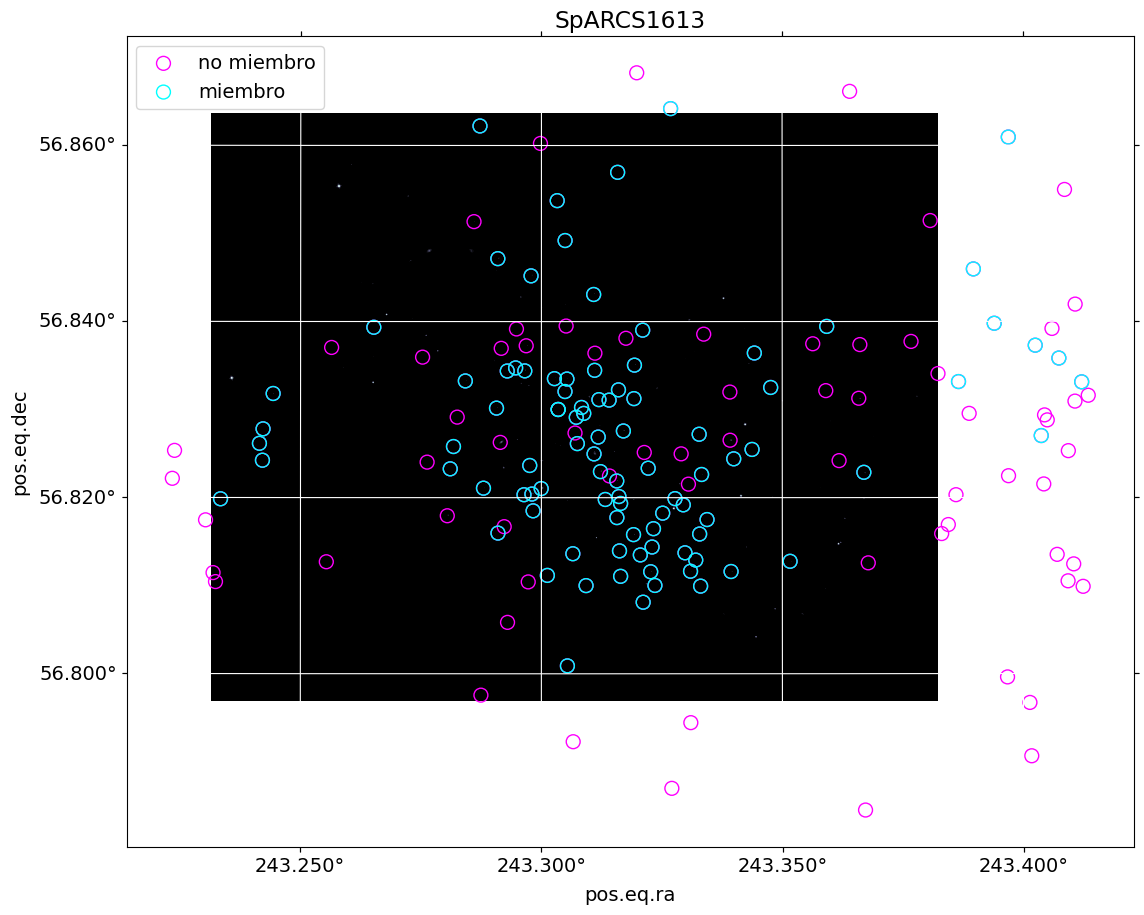

In [54]:
desplegar_imagen(image, wcs, Hubble, selection, copy_cluster, redshift_table)

Como se esperaba, la imagen procesada se alinea con las posiciones delineadas por la base de datos. Algunas galaxias aparecen tenues, mientras que hay dos galaxias brillantes cerca de la región central. Para las galaxias dentro del área de la imagen, los círculos de superposición marcan cuáles de ellas son miembros (en cian) o no miembros (en magenta).

En resumen, las tablas de datos del cúmulo y de las galaxias se leyeron desde GOGREEN DR1. Luego, seleccionamos un cúmulo específico con la mayor masa dinámica basado en la mayor dispersión de velocidades como ejemplo. Una forma de visualizar el estado de membresía del cúmulo fue graficando por separado las galaxias no miembros y miembros, codificadas por corrimiento al rojo. Las galaxias miembros tienen corrimientos al rojo similares por definición y se asume que están en un cúmulo gravitacionalmente ligado (por ejemplo, moviéndose juntas como grupo alejándose de nosotros a medida que el universo se expande). Finalmente, utilizamos el servicio SIA para buscar las urls de imágenes procesadas, y la imagen de Hubble por omisión muestra que podemos emparejar correctamente el dataset con las imágenes.

<a class="anchor" id="GG6"></a>
# Referencias

[Wikipedia contributors.](https://en.wikipedia.org/wiki/Mollweide_projection) "Mollweide projection." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 23 Feb. 2022. Web.

[Wikipedia contributors.](https://en.wikipedia.org/wiki/Velocity_dispersion) "Velocity dispersion." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 25 Jun. 2022. Web.

Notebook [Acceso a los datos del Data Release 1 de GOGREEN en Astro Data Lab](https://github.com/astro-datalab/notebooks-latest-es/blob/master/03_EjemplosDeCiencia/GOGREEN_GalaxiasEnEntornosEnriquecidos/1_GOGREENDR1AccesoADatosEnDataLab.ipynb)

Notebook [GOGREEN DR1 en Data Lab - Acceso Simple a Imágenes (SIA))](https://github.com/astro-datalab/notebooks-latest-es/blob/master/03_EjemplosDeCiencia/GOGREEN_GalaxiasEnEntornosEnriquecidos/2_GOGREENDr1SIA.ipynb)

[Balogh et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021MNRAS.500..358B/abstract) "The GOGREEN and GCLASS surveys: first data release." MNRAS 500, 358